In [1]:
# Import Modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statistics
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from mpl_toolkits.mplot3d import Axes3D
from itertools import combinations
from itertools import permutations
from scipy.spatial.distance import pdist, squareform
from scipy.ndimage import zoom

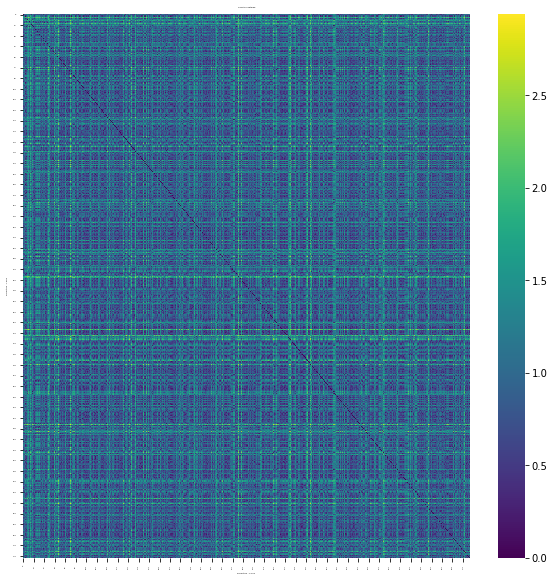

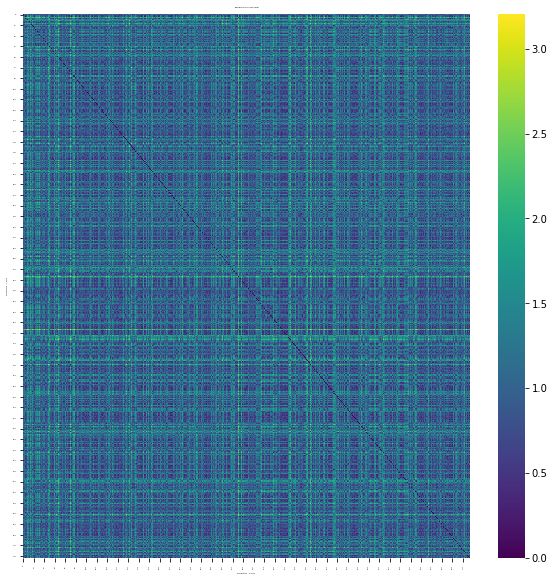

In [2]:
# Read COMAD 2 dim dist matrix
COMAD = 'COMAD-PIMA.csv' 
COMAD_csv = pd.read_csv(COMAD)

# Read MEAN PCA 2 dim  dist matrix
MEAN_PCA = 'PCA-MEAN-PIMA.csv' 
MEAN_PCA_csv = pd.read_csv(MEAN_PCA)

# Read naming columns
columns = 'columns_heatmap.csv' 
columns_csv = pd.read_csv(columns)

dist_matrices = [COMAD_csv, MEAN_PCA_csv]
method_names = ['COMAD heatmap', 'Traditional PCA heatmap']

for i,j in zip(dist_matrices,method_names):
    plt.figure(figsize=(10, 10))
    sns.heatmap(i, cmap='viridis', annot=False, annot_kws={"size": 10})

    title_fontsize = 2
    label_fontsize = 2

    plt.title(f'{j}', fontsize=title_fontsize)
    plt.xlabel('Projection - X axis', fontsize=label_fontsize)
    plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

    ax = plt.gca()
    ax.tick_params(axis='x', labelsize=label_fontsize)
    ax.tick_params(axis='y', labelsize=label_fontsize)

    plt.show()

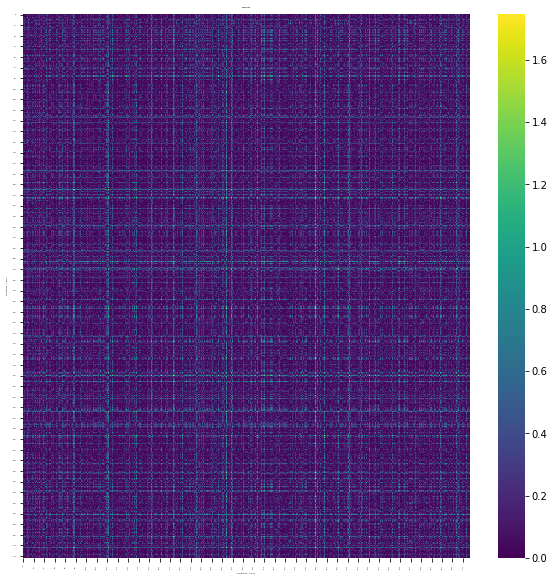

In [3]:
# Calculate the absolute difererce of 2 dist matrices andplot heatmap
abs_diff_dist_matrices = (COMAD_csv - MEAN_PCA_csv).abs()

# Normalize the DataFrame to get percentages
normalized = abs_diff_dist_matrices / abs_diff_dist_matrices.sum().sum() * 100

plt.figure(figsize=(10, 10))
sns.heatmap(abs_diff_dist_matrices, cmap='viridis', annot=False, annot_kws={"size": 10},fmt='.2f')

title_fontsize = 2
label_fontsize = 2

plt.title('Heatmap', fontsize=title_fontsize)
plt.xlabel('Projection - X axis', fontsize=label_fontsize)
plt.ylabel('Projection - Y axis', fontsize=label_fontsize)

ax = plt.gca()
ax.tick_params(axis='x', labelsize=label_fontsize)
ax.tick_params(axis='y', labelsize=label_fontsize)

plt.show()

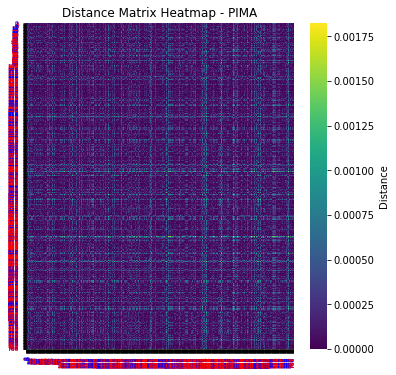

In [4]:
# Create a custom color mapping based on the species
species_color_mapping = columns_csv['Outcome'].map({0: 'red', 1: 'blue'})

# Plot the distance matrix heatmap with colored labels
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(normalized, cmap='viridis', ax=ax,
            cbar_kws={'label': 'Distance'})

# Set the tick labels and colors
ax.set_xticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_yticks(np.arange(normalized.shape[0]) + 0.5)
ax.set_xticklabels(species_color_mapping.index, rotation=90, fontsize=6)
ax.set_yticklabels(species_color_mapping.index, rotation=0, fontsize=6)

# Color the tick labels
for tick, color in zip(ax.get_xticklabels(), species_color_mapping):
    tick.set_color(color)

for tick, color in zip(ax.get_yticklabels(), species_color_mapping):
    tick.set_color(color)

# Show the plot
plt.title('Distance Matrix Heatmap - PIMA')
plt.show()

In [5]:
def overall_difference_percentage(matrix1, matrix2):
    # Calculate the Frobenius norms
    norm_difference = np.linalg.norm(matrix1 - matrix2)
    norm_average = np.linalg.norm((matrix1 + matrix2) / 2)
    
    # Return the percentage difference
    return (norm_difference / norm_average) * 100

overall_diff_percentage = overall_difference_percentage(MEAN_PCA_csv, COMAD_csv)
print(overall_diff_percentage)

21.035324175170718
